In [1]:
import torchtext
from torchtext.legacy import data
from torchtext.legacy import datasets
print(torchtext.__version__)


0.9.0


In [2]:
# create Field objects
SESSION_ID = data.Field()
TIMESTAMP = data.Field()
USER_ID = data.Field()
PRODUCT_ID = data.Field()
EVENT_TYPE = data.Field()
OFFERED_DISCOUNT = data.Field()
PURCHASE_ID = data.Field()

# create a dictionary representing the dataset
fields = {
  'session_id': ('session_id', SESSION_ID),
  'timestamp': ('timestamp', TIMESTAMP),
  'user_id': ('user_id', USER_ID),
  'product_id': ('product_id', PRODUCT_ID),
  'event_type': ('event_type', EVENT_TYPE),
  'offered_discount': ('offered_discount', OFFERED_DISCOUNT),
  'purchase_id': ('purchase_id', PURCHASE_ID)
}

# load the dataset in json format
train_ds, valid_ds, test_ds = data.TabularDataset.splits(
  path = 'data',
  train = 'sessions.jsonl',
  validation = 'sessions.jsonl',
  test = 'sessions.jsonl',
  format = 'json',
  fields = fields
)




In [3]:
# check an example
print(vars(train_ds[0]))
print(vars(train_ds[2]))

{'session_id': 100001, 'timestamp': ['2021-01-27T08:29:10'], 'user_id': 102, 'product_id': 1233, 'event_type': ['VIEW_PRODUCT'], 'offered_discount': 0, 'purchase_id': None}
{'session_id': 100001, 'timestamp': ['2021-01-27T08:36:37'], 'user_id': 102, 'product_id': None, 'event_type': ['BUY_PRODUCT'], 'offered_discount': 0, 'purchase_id': 20001}


In [4]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
data = pd.read_json(os.path.abspath('') + "/data/sessions.jsonl", lines=True)
data = data[['session_id','timestamp','user_id','product_id','event_type','offered_discount','purchase_id']]

cleanup = {"event_type":{"BUY_PRODUCT":1, "VIEW_PRODUCT":-1}}
data = data.replace(cleanup)
#data = data.fillna(0)

In [186]:
data

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
0,100001,2021-01-27 08:29:10,102.0,1233.0,0,0,NaN
1,100001,2021-01-27 08:32:04,102.0,1234.0,0,0,NaN
2,100001,2021-01-27 08:36:37,102.0,NaN,1,0,20001.0
3,100002,2021-02-01 08:17:36,102.0,1072.0,0,0,NaN
4,100002,2021-02-01 08:22:30,102.0,1073.0,0,0,NaN
...,...,...,...,...,...,...,...
56719,110270,2021-03-12 08:18:09,301.0,NaN,0,10,NaN
56720,110270,2021-03-12 08:21:03,301.0,1039.0,0,10,NaN
56721,110271,2021-02-02 05:38:37,301.0,1035.0,0,0,NaN
56722,110271,2021-02-02 05:38:42,301.0,1067.0,0,0,NaN


<AxesSubplot:>

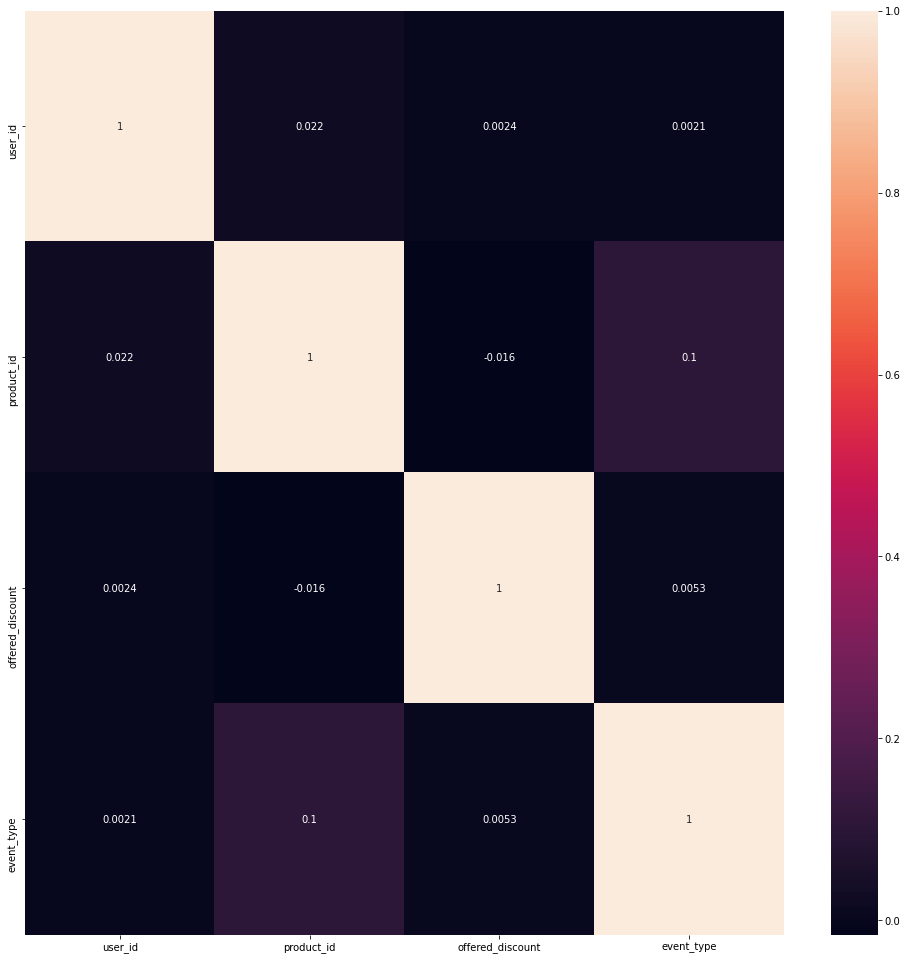

In [5]:

plt.figure(figsize=(17,17))
valuable_data = ['timestamp','user_id', 'product_id', 'offered_discount', 'event_type' ]
sns.heatmap(data[valuable_data].corr(),annot = True)

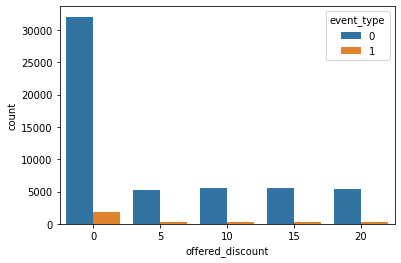

In [6]:

g = sns.countplot(x="offered_discount",hue="event_type",data=data)

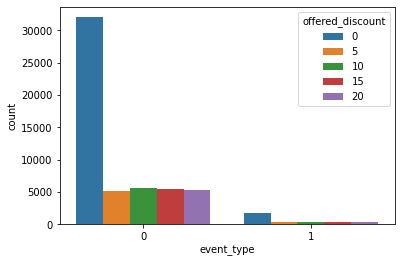

In [7]:
g2 = sns.countplot(x="event_type",hue="offered_discount",data=data)

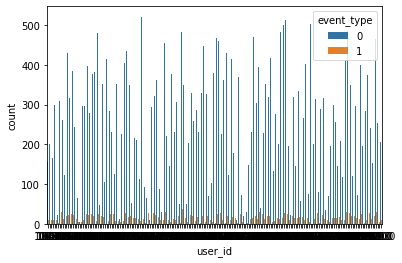

In [8]:
g3 = sns.countplot(x='user_id',hue='event_type',data=data)

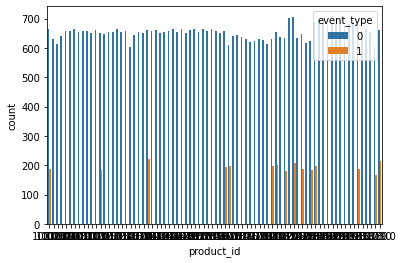

In [9]:
g4 = sns.countplot(x='product_id',hue='event_type',data=data)

In [10]:
d1 = data[data.event_type == 1].groupby(['offered_discount']).count()['event_type']
d1

offered_discount
0     1790
5      311
10     298
15     332
20     322
Name: event_type, dtype: int64

In [11]:
d2 = data.groupby(['offered_discount']).count()['event_type']
d2

offered_discount
0     33803
5      5495
10     5906
15     5880
20     5640
Name: event_type, dtype: int64

In [12]:
d3 = d1/d2
d3

offered_discount
0     0.052954
5     0.056597
10    0.050457
15    0.056463
20    0.057092
Name: event_type, dtype: float64

<AxesSubplot:title={'center':'buy to all'}, xlabel='offered_discount'>

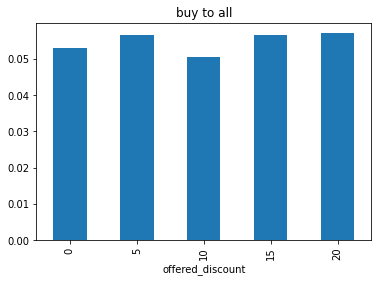

In [13]:
d3.plot(kind='bar',title='buy to all')

In [14]:
d4 = data[data.event_type == 1]
d4.head()

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
2,100001,2021-01-27 08:36:37,102.0,NaN,1,0,20001.0
8,100002,2021-02-01 08:30:37,102.0,1222.0,1,0,20002.0
43,100008,2021-01-06 07:06:04,102.0,1057.0,1,5,20003.0
46,100009,2021-02-24 13:57:36,NaN,1277.0,1,0,20004.0
53,100011,2021-03-06 12:57:19,102.0,NaN,1,0,20005.0


<AxesSubplot:xlabel='product_id', ylabel='count'>

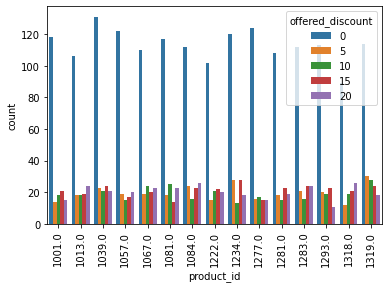

In [15]:
g_prod_disc = sns.countplot(x='product_id',hue='offered_discount',data=d4)
g_prod_disc.set_xticklabels(g_prod_disc.get_xticklabels(), rotation=90)
g_prod_disc

In [16]:
d5 = data[data.user_id == 301]



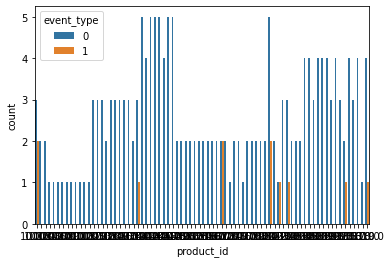

In [17]:
g5 = sns.countplot(x="product_id",hue="event_type",data=d5)


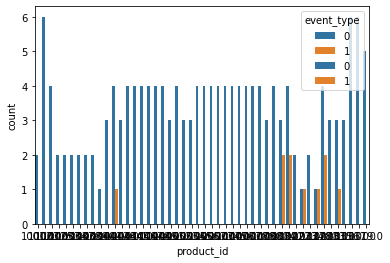

In [18]:
g6 = [sns.countplot(x="product_id",hue="event_type",data=data[data.user_id == x]) for x in range(299,301)]

In [19]:
pd.set_option('display.max_rows', 30)
data[data.event_type == 1].sort_values('timestamp')

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
14232,102533,2021-01-01 01:58:47,150.0,1222.0,1,0,20736.0
6215,101125,2021-01-01 02:31:07,124.0,1084.0,1,0,20313.0
43992,107933,2021-01-01 02:34:13,256.0,1084.0,1,0,22357.0
40266,107287,2021-01-01 02:48:26,243.0,1222.0,1,0,22174.0
2720,100497,2021-01-01 02:53:19,113.0,1318.0,1,0,20145.0
...,...,...,...,...,...,...,...
55589,110072,2021-03-15 06:11:57,297.0,NaN,1,0,22995.0
56096,110166,2021-03-15 06:56:06,298.0,1013.0,1,0,23024.0
32835,105949,2021-03-15 07:10:52,217.0,1001.0,1,0,21757.0
36972,106704,2021-03-15 07:54:01,NaN,1039.0,1,0,21986.0


In [85]:
pd.set_option('display.max_rows', 30)
d6 = data[data.product_id.isin(d4.product_id)][valuable_data].dropna()
d6 = d6.sort_values(by = ['user_id','product_id','timestamp'])
d6


,timestamp,user_id,product_id,offered_discount,event_type
95,2021-02-21 22:09:25,102.0,1001.0,0,0
96,2021-02-21 22:13:44,102.0,1001.0,0,1
63,2021-01-01 04:02:07,102.0,1013.0,0,0
136,2021-01-22 07:09:22,102.0,1013.0,0,0
109,2021-03-15 03:49:29,102.0,1013.0,0,0
...,...,...,...,...,...
56688,2021-01-08 09:59:50,301.0,1319.0,10,0
56621,2021-02-18 22:24:13,301.0,1319.0,0,0
56646,2021-03-10 07:49:50,301.0,1319.0,0,0
56647,2021-03-10 07:51:58,301.0,1319.0,0,1


In [140]:

d7 = data[data.product_id.isin(d4.product_id)][valuable_data].dropna().sort_values(by = ['user_id','product_id','timestamp'])
d7

,timestamp,user_id,product_id,offered_discount,event_type
95,2021-02-21 22:09:25,102.0,1001.0,0,0
96,2021-02-21 22:13:44,102.0,1001.0,0,1
63,2021-01-01 04:02:07,102.0,1013.0,0,0
136,2021-01-22 07:09:22,102.0,1013.0,0,0
109,2021-03-15 03:49:29,102.0,1013.0,0,0
...,...,...,...,...,...
56688,2021-01-08 09:59:50,301.0,1319.0,10,0
56621,2021-02-18 22:24:13,301.0,1319.0,0,0
56646,2021-03-10 07:49:50,301.0,1319.0,0,0
56647,2021-03-10 07:51:58,301.0,1319.0,0,1


czas od ostatniego zakupu/pierwszego spojrzenia, ilość wejść w tym czasie, maksymalna zaoferowana zniżka, obecna zniżka, czy kupił

niezdecydowany: patrzył i nie kupił, dostał zniżkę i nie kupił
zdecydowany: dostał zniżkę nie kupił ale i tak kupił później, kupił od razu

In [137]:
dd7 = d7.groupby(["user_id", "product_id"]).get_group((102,1067))
dd7.timestamp = dd7['timestamp'].diff()
dd7

/home/tisek/.local/lib/python3.8/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,timestamp,user_id,product_id,offered_discount,event_type
125,NaT,102.0,1067.0,0,0
126,0 days 00:02:32,102.0,1067.0,0,1
20,37 days 20:26:22,102.0,1067.0,0,0
52,25 days 20:06:06,102.0,1067.0,0,0


# Patera

In [194]:
data[valuable_data]

,timestamp,user_id,product_id,offered_discount,event_type
0,2021-01-27 08:29:10,102.0,1233.0,0,0
1,2021-01-27 08:32:04,102.0,1234.0,0,0
2,2021-01-27 08:36:37,102.0,NaN,0,1
3,2021-02-01 08:17:36,102.0,1072.0,0,0
4,2021-02-01 08:22:30,102.0,1073.0,0,0
...,...,...,...,...,...
56719,2021-03-12 08:18:09,301.0,NaN,10,0
56720,2021-03-12 08:21:03,301.0,1039.0,10,0
56721,2021-02-02 05:38:37,301.0,1035.0,0,0
56722,2021-02-02 05:38:42,301.0,1067.0,0,0


In [242]:
import numpy as np
clean_data = data[valuable_data]
for i, d in clean_data.iterrows():
    if d.isnull().product_id and d.event_type == 1:
        clean_data.at[i,'product_id'] = clean_data.at[i-1,'product_id']
    if d.isnull().user_id and d.event_type == 1:
        clean_data.at[i,'user_id'] = clean_data.at[i-1,'user_id']
    if d.event_type != 1:
        if d.isnull().user_id and clean_data.at[i-1,'user_id'] == clean_data.at[i+1,'user_id']:
            clean_data.at[i,'user_id'] = clean_data.at[i-1,'user_id']


In [243]:
clean_data

,timestamp,user_id,product_id,offered_discount,event_type
0,2021-01-27 08:29:10,102.0,1233.0,0,0
1,2021-01-27 08:32:04,102.0,1234.0,0,0
2,2021-01-27 08:36:37,102.0,1234.0,0,1
3,2021-02-01 08:17:36,102.0,1072.0,0,0
4,2021-02-01 08:22:30,102.0,1073.0,0,0
...,...,...,...,...,...
56719,2021-03-12 08:18:09,301.0,NaN,10,0
56720,2021-03-12 08:21:03,301.0,1039.0,10,0
56721,2021-02-02 05:38:37,301.0,1035.0,0,0
56722,2021-02-02 05:38:42,301.0,1067.0,0,0


In [179]:
sorted_data = data[valuable_data].dropna().sort_values(by = ['user_id','product_id','timestamp'])

In [180]:
dick = [x for _, x in sorted_data.groupby(["user_id", "product_id"])] 


In [181]:
split_dick = []
for d in dick:
    last = 0
    for i in range(len(d)):
        if d.iloc[i].event_type == 1:
            split_dick.append(d[last:i+1])
            last = i+1
    if last < len(d):
        split_dick.append(d[last:len(d)])

In [182]:
for d in split_dick:
    t1 = d['timestamp'].diff()
    d.timestamp = t1

/home/tisek/.local/lib/python3.8/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [183]:
split_dick[3]

,timestamp,user_id,product_id,offered_discount,event_type
56,NaT,102.0,1006.0,0,0
129,21 days 03:19:13,102.0,1006.0,0,0
102,51 days 20:41:30,102.0,1006.0,0,0


In [184]:
final_data = []
for d in split_dick:
    n_visits = len(d)
    d_time = d.sum().timestamp.total_seconds()
    max_disc = d.max().offered_discount
    curr_disc = d.tail(1).offered_discount.item()
    is_purchased = d.tail(1).event_type.item()
    final_data.append([d_time,n_visits,max_disc,curr_disc,is_purchased]) 

In [185]:
df = pd.DataFrame(final_data,columns=["d_time","n_visits","max_disc","curr_disc","is_purchased"])
df

,d_time,n_visits,max_disc,curr_disc,is_purchased
0,259.0,2,0,0,1
1,6307192.0,3,0,0,0
2,6307195.0,3,0,0,0
3,6307243.0,3,0,0,0
4,6307206.0,3,0,0,0
...,...,...,...,...,...
15379,5262935.0,3,10,0,0
15380,5308657.0,4,15,15,0
15381,0.0,1,15,15,0
15382,5262728.0,4,10,0,1
